# Important Note
Due to saving the Jupyter Notebook from the cloud to the local computer, some widgets were lost or are populating as 0%. When the Jupyter Notebook was run in the cloud, all process bar widgets loaded to 100% and all mapping and data extraction occured (the visualizations are just no longer available due to removing the Jupyter Notebook from the instance)

In [1]:
!pip install datasets
!pip install opencv-python
!pip install tensorflow

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.17
    Uninstalling multiprocess-0.70.17:
      Successfully uninstalled multiprocess-0.70.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathos 0.3.3 requires dill>=0.3.9, but you have dill 0.3.8 which is incompatible.
pathos 0.3.3 requires multiprocess>=0.70.17, but you have multiprocess 0.70.16 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 139.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 18

In [2]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from datasets import load_dataset
import numpy as np
import boto3
from tqdm import tqdm
import os
import pandas as pd
from datasets import concatenate_datasets
from PIL import Image
import io
from concurrent.futures import ThreadPoolExecutor, as_completed
from tensorflow.keras.preprocessing.image import img_to_array
tf.config.set_visible_devices([], 'GPU')
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

2024-12-06 06:37:17.611311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733467037.632186    8415 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733467037.638344    8415 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 06:37:17.658946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-06 06:37:46.217227: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: 

# Important Info

## Labels
0: Battery \
1: Biological \
2: Cardboard \
3: Glass \
4: Metal\
5: Paper\
6: Plastic\
7: Trash

# Data Cleaning
## Hugging Face

In [3]:
ds = load_dataset("viola77data/recycling-dataset")

README.md:   0%|          | 0.00/743 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/3107 [00:00<?, ?it/s]

011_71dad02a.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

002_1be6d60f.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

003_fd9bd466.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

005_a0bb6026.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

009_9bd7532f.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

004_669bde50.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

001_7fa9f389.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

010_c5b5fd94.jpg:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

014_0f10c62f.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

006_6235810d.jpg:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

012_bfb2a9a1.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

013_38254b18.jpg:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

008_36a310c6.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

016_48525673.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

007_c0173250.jpg:   0%|          | 0.00/26.5k [00:00<?, ?B/s]

015_3192d1ec.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

028_fc6feeef.jpg:   0%|          | 0.00/67.0k [00:00<?, ?B/s]

023_1876700a.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

029_b29cf8a0.jpg:   0%|          | 0.00/54.1k [00:00<?, ?B/s]

021_53e5101a.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

027_09974660.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

022_5cbce81d.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

025_53b19967.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

019_f405ea00.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

026_4245ed78.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

020_d2decded.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

017_337843cb.jpg:   0%|          | 0.00/52.3k [00:00<?, ?B/s]

018_c08fc582.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

024_2527f046.jpg:   0%|          | 0.00/50.2k [00:00<?, ?B/s]

032_3b606c00.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

037_841b3e8d.jpg:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

038_0457f433.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

033_413b4ce0.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

041_56fbd667.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

046_f1c77b1a.jpg:   0%|          | 0.00/38.2k [00:00<?, ?B/s]

043_e33f7dbb.jpg:   0%|          | 0.00/96.4k [00:00<?, ?B/s]

044_835bb072.jpg:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

030_cfbd6228.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

036_57c42720.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

034_dcb757f8.jpg:   0%|          | 0.00/85.1k [00:00<?, ?B/s]

039_78636540.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

045_85393c11.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

031_d7c4ffaf.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

040_513a0394.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

042_02cef228.jpg:   0%|          | 0.00/51.2k [00:00<?, ?B/s]

064_536229b9.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

062_0da9f7ae.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

057_1dc06598.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

060_6b1d7c6c.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

055_4a0fd5a7.jpg:   0%|          | 0.00/50.8k [00:00<?, ?B/s]

051_825dc25e.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

048_420e86db.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

056_8af1341a.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

050_9c74a498.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

054_6c086c3b.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

053_f88336d4.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

061_908d93f2.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

063_c249c27d.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

047_4c3d5167.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

059_1e66d359.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

065_6bd01fb2.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

078_1f2268d0.jpg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

081_989f895b.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

073_33243bba.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

079_5a248c98.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

069_fca3c728.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

080_b4ecd65d.jpg:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

070_03970ba2.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

067_4e9f3dc3.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

074_d7b7fee5.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

066_23d4140a.jpg:   0%|          | 0.00/99.4k [00:00<?, ?B/s]

068_70cf0c4b.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

076_8b765965.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

077_6d13c69d.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

075_6fbf662f.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

071_729590b0.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

072_580e5714.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

098_657fe3f8.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

084_34e785b6.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

085_e0a4dfcd.jpg:   0%|          | 0.00/48.4k [00:00<?, ?B/s]

083_710b45d1.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

093_4fff318b.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

094_6e25816e.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

088_75721e55.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

082_91b5c5b5.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

095_3b593cf2.jpg:   0%|          | 0.00/50.7k [00:00<?, ?B/s]

089_e7be9522.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

087_f96ca581.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

099_2bbc2c7b.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

086_29147e76.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

096_29190077.jpg:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

097_01f4d1d7.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

090_df16268e.jpg:   0%|          | 0.00/58.7k [00:00<?, ?B/s]

104_31ac40e2.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

106_a99ca409.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

100_77a622c3.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

105_d3ec31b1.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

107_76280a20.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

110_324d6350.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

115_f8c2ef15.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

113_ca693ae1.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

114_3e31be72.jpg:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

111_f214b49b.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

109_2c5fb83b.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

118_b822d896.jpg:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

116_8bebb06c.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

117_230c6417.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

112_44130750.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

121_bb1c02bb.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

119_6da923dd.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

120_6e571e5d.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

134_1f63bbf0.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

128_21230379.jpg:   0%|          | 0.00/9.31k [00:00<?, ?B/s]

129_45eadc5c.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

124_24869d40.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

131_b02b173d.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

123_80cee02e.jpg:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

132_11b72c37.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

127_30e42589.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

130_ad00385d.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

126_d75c087e.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

133_49b9defa.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

136_ea2694f9.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

148_5544e9bc.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

151_4d6e1ac7.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

150_8e2395bd.jpg:   0%|          | 0.00/51.4k [00:00<?, ?B/s]

138_dd9803c1.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

141_7f5dd4b5.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

143_e81b8f4d.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

144_bab62342.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

145_86f3f090.jpg:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

146_58ba4bc9.jpg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

154_220530d8.jpg:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

152_cb510044.jpg:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

140_107007aa.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

139_1d8fdc24.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

149_84bb49e2.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

142_89afcd3d.jpg:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

153_d7b750f6.jpg:   0%|          | 0.00/45.7k [00:00<?, ?B/s]

155_f56c4d0f.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

165_f9273fc1.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

168_095626a0.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

162_52c0929c.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

163_530b3e54.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

160_003ecfd5.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

164_257e3b8d.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

167_e199c966.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

169_3001f26f.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

159_a31f516d.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

166_33bc0644.jpg:   0%|          | 0.00/55.6k [00:00<?, ?B/s]

161_65b7d610.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

158_1c8f69bb.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

156_b7da1a50.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

157_ce5fbfe1.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

171_07fdcff7.jpg:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

174_9e0649a3.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

177_ddd93850.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

172_9f2e83ec.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

180_f60c9f0c.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

176_b520ea2f.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

175_ce098011.jpg:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

185_037436c1.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

186_441c97e4.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

178_7c2c1d3b.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

181_25a92b12.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

182_b32472d3.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

184_9d0d6002.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

189_6a394737.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

183_3e98b052.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

188_8c9ec753.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

187_e24a10d1.jpg:   0%|          | 0.00/52.5k [00:00<?, ?B/s]

198_47618b76.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

193_e2e1b036.jpg:   0%|          | 0.00/9.80k [00:00<?, ?B/s]

200_0a32da6c.jpg:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

201_d0b42c9d.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

204_32bda9cb.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

191_01eb3663.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

202_0c82cc34.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

194_87172e62.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

196_75c681f0.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

206_911f4be3.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

192_f2e27723.jpg:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

190_13837dea.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

199_84be3a04.jpg:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

205_be0c0d67.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

207_4be45ebb.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

209_2c1b45a2.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

213_37d19eb0.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

211_c5f065f7.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

216_2174fb16.jpg:   0%|          | 0.00/44.8k [00:00<?, ?B/s]

218_27871122.jpg:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

217_757aa4c4.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

221_02e97487.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

220_63be89c7.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

210_0f75c428.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

223_b9031490.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

212_7d90d4fe.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

225_d0ddd73f.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

227_01c1d68b.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

224_e27bc3e5.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

228_f15e0370.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

229_1cad1174.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

243_c4b670c6.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

247_ff6adc6f.jpg:   0%|          | 0.00/83.8k [00:00<?, ?B/s]

242_519286a3.jpg:   0%|          | 0.00/68.5k [00:00<?, ?B/s]

246_a22fa67e.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

237_56ceb24d.jpg:   0%|          | 0.00/82.0k [00:00<?, ?B/s]

231_778ba52f.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

240_3c0c9d30.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

245_4d5f060d.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

233_4f9c6726.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

236_c0eac431.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

234_a37b29ac.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

244_ea1f442e.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

248_dc6b1284.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

239_16a790f5.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

232_cbcd82e7.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

251_723ceca4.jpg:   0%|          | 0.00/56.6k [00:00<?, ?B/s]

250_6cb901dc.jpg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

254_49fb06f8.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

255_f51b7ec4.jpg:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

261_c8bda576.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

253_4e6c2057.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

256_ec7d815a.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

252_832665de.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

263_9a509c23.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

265_48b63007.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

258_42d951aa.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

257_96536d95.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

260_0c2f8b2c.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

262_3ec71603.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

259_806003c8.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

249_0bc9c071.jpg:   0%|          | 0.00/9.58k [00:00<?, ?B/s]

267_bd00dc0e.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

273_ce1f2fc8.jpg:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

272_49041e13.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

282_bffb76c9.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

278_3500c4c0.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

284_722368b1.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

266_9e815420.jpg:   0%|          | 0.00/74.6k [00:00<?, ?B/s]

275_23e49988.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

279_1792b0c4.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

277_aa41d2b0.jpg:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

281_b78ea39d.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

271_0c322c6d.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

274_46e8d049.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

268_196f1604.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

276_9893bb0b.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

280_3b916e3a.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

290_20205b65.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

294_cd8d8332.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

295_26543738.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

300_88da94b8.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

293_7ca12e7c.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

289_12de0b67.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

298_850d7b60.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

299_c3077b3a.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

003_793ffd6d.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

001_bd75a457.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

285_102441dc.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

288_cc00d6e3.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

297_c66d7459.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

287_82471c1d.jpg:   0%|          | 0.00/9.78k [00:00<?, ?B/s]

291_3f1e06f4.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

002_c58111e4.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

014_03a8936b.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

013_283ac52b.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

009_d36588bc.jpg:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

015_412778f0.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

008_48527455.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

005_f42fa779.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

016_79b788c6.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

010_d117bc71.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

018_f18a7816.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

006_36dfd42e.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

011_a4df0db1.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

017_6d124cc6.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

004_d2595ae1.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

007_39902bd6.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

012_1d1a57cd.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

019_a3ff486d.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

030_085927fe.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

021_e85da50c.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

032_46f067fc.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

028_21222a7f.jpg:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

025_fc0d8b48.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

034_c1b9e3be.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

024_e274b859.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

035_023233fb.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

026_d9f4fb3b.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

031_b4139284.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

022_82c80f9a.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

033_9524274c.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

029_d51a863d.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

023_7a6e8662.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

027_4aa94d62.jpg:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

020_e627da33.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

036_526d1003.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

037_ed0dc3f6.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

050_ed7a915e.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

044_2f494c0f.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

048_d6e750f8.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

043_d1207b92.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

039_1b30b476.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

041_bde3707d.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

040_615e1002.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

045_ad91ba79.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

051_780ee185.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

047_a7335179.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

049_1cad9d0f.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

046_309a0657.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

042_b7205497.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

038_f9c94729.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

062_2a66a592.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

059_76a8a806.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

066_0f322436.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

052_bb7e9451.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

054_276eaf18.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

053_5677a7c5.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

056_7cbeb442.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

061_19b8287b.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

060_8719e2a5.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

064_59435e50.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

057_04161f37.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

055_09d6e038.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

063_d6fe176d.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

065_2cb53c11.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

058_2c72db3d.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

067_0292f82a.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

071_ea83775d.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

068_72b0530a.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

072_dd8f09bd.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

069_57d61f74.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

074_2b38b5cf.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

076_bb6f6b2d.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

075_0209451a.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

082_74d743e3.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

081_47dc10a7.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

079_01b379c0.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

073_e07116a3.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

078_68fd69bd.jpg:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

080_9bd01405.jpg:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

077_013da5eb.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

083_3c4fdeee.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

085_fba5f889.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

093_762dddea.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

084_3ec8303e.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

089_b3ad9f05.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

087_bcb14ff2.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

092_32754661.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

095_19663b29.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

094_89ce2be9.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

097_a3d9b842.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

088_6f31aa2e.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

099_73dd694a.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

098_84b7e7d8.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

091_2907149e.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

096_d96ec115.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

086_572c3b74.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

090_f64ecbfd.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

107_7612df78.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

100_a383a438.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

102_9bfd1f67.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

101_040d2fe1.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

103_7c3908e0.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

104_55168b95.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

112_2b94cf9f.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

106_23e66942.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

108_f4ef9e59.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

110_95bde87f.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

116_a4ea0b05.jpg:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

113_829e6fc6.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

105_d822dd45.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

115_185f7d0e.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

117_f9f5acb3.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

128_e944522e.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

131_becf74fd.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

123_6e9efaa1.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

132_6da66479.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

130_8557cbdd.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

136_b0e9befe.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

122_3d6ac46a.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

127_11eb2dab.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

124_51e1351b.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

121_c38e391e.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

125_6749e157.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

134_c4a9f877.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

126_60cbadeb.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

135_c1e96759.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

140_6e3a2bcc.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

141_0c50cb1b.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

139_22001a94.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

142_2cb277fb.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

144_ec8785ff.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

148_32b467d0.jpg:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

147_82d2ab4b.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

146_6e6ab136.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

145_2dfd2540.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

143_71b08b6a.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

151_c07770d6.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

149_506d4fb4.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

138_97ff355d.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

150_11d688e3.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

152_70396aed.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

153_75ff0548.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

154_951a881c.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

155_8f44029e.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

162_5c675670.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

166_16b329e8.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

160_81bdd24f.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

167_54b683f9.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

163_807548bf.jpg:   0%|          | 0.00/60.8k [00:00<?, ?B/s]

165_152540ae.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

168_e1ee1628.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

159_46a9badc.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

161_e42e41d2.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

158_1f7af295.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

156_825e9b22.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

164_0c4cccf3.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

157_56b0437c.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

169_409d4c65.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

176_09cf61c3.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

177_7211d4cd.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

179_297bd2f1.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

180_d005ad35.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

183_385ac7df.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

181_f25f0fb8.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

182_2c73e5d4.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

185_b6868b10.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

171_de962473.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

175_4e2a731f.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

174_d9fd3644.jpg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

184_f5d483a5.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

172_48b58cb5.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

170_a8de487c.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

173_fcc0a350.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

178_360db0c9.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

186_1667f5cc.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

195_64f66323.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

188_9e8693b2.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

193_7357515b.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

191_aba927e0.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

194_c15f7b61.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

198_2e29b535.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

190_99f2ccf4.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

196_8a0dc193.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

200_0205e62e.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

199_6037560b.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

192_b07be9a2.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

187_f923a95c.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

189_38f1b02a.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

197_e353fb93.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

202_0f90491f.jpg:   0%|          | 0.00/32.2k [00:00<?, ?B/s]

209_31be1f2d.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

212_ec2a763e.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

204_eb32e1e3.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

213_993e34c4.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

218_341364c9.jpg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

203_c2896584.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

214_cd2dcbb1.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

217_af791553.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

207_49877aef.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

211_c04244fb.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

215_4a265dc2.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

219_c903ec75.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

210_7cc7bdcb.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

220_df582f51.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

221_10ad93c8.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

232_e8055a91.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

228_459990e0.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

234_0995708f.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

230_86db8688.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

227_4b390237.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

231_89641427.jpg:   0%|          | 0.00/63.4k [00:00<?, ?B/s]

223_1ec521db.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

222_d924bc11.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

225_0a0da278.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

226_29a265f5.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

236_6a7e7a70.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

224_2c252b36.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

229_b53bd867.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

237_ed76c1d3.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

250_c068ece9.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

245_0648c454.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

248_6d827d38.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

246_9cb82a5e.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

239_770870df.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

244_ca93527f.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

242_f8d4106e.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

243_3801d850.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

252_e0904833.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

238_d962ce9f.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

241_78000cde.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

240_2df56cc1.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

253_64efb52e.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

251_3aeb5d09.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

247_6b5baa7b.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

249_6d973762.jpg:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

267_0db642a2.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

269_97ca183d.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

268_a5f9e5c4.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

261_931fb86e.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

256_d890e109.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

257_43b6f3bc.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

259_17e38004.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

258_b8f14679.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

266_033d95f1.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

255_7287efaf.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

254_f06d8f05.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

262_4b7f4c02.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

263_ae4a16df.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

260_f24a6751.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

265_3895d9f9.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

264_6772193c.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

272_df852587.jpg:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

273_de6aec74.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

275_2fe901c5.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

274_d2f6d5b4.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

271_87901e51.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

281_242a05d2.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

277_953aee76.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

280_bbbf2b63.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

284_39288065.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

282_9f171b10.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

283_36454335.jpg:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

276_a23b45fa.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

278_b94f619a.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

270_018dd974.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

279_d8baa5d3.jpg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

285_16c4a91b.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

287_a80d09a3.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

286_bdbd9618.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

288_fbef6c8f.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

296_9bf9fb07.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

297_9ee84ede.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

299_19a695c2.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

290_1ba4e5fe.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

295_1b22818d.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

293_edf24abc.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

294_7b753703.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

289_f06dc33f.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

001_2def4866.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

291_7f0610ff.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

292_6dc4fcec.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

298_4c107a74.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

300_d5c3a6c2.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

006_7df0e5a3.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

014_da11ad76.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

013_007ddffb.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

002_724d18a2.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

004_c088862a.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

011_71bbc0e3.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

012_ef399e37.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

015_55675d49.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

003_a4ba8b63.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

010_7167449e.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

009_e0f31b40.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

008_0825b645.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

007_63bf97fe.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

005_2d3bec90.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

016_4d276dc3.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

032_a0ba8875.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

019_b8cad885.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

020_e11a8bcd.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

024_295ed8e9.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

021_6238143e.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

023_7dfd6857.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

027_4b794ff1.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

028_1cb45068.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

029_a63101c2.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

026_60d412c2.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

022_e78c0de9.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

017_aa3ec52f.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

031_8ee1badc.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

025_66e9abda.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

018_53ef0344.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

030_7baebc9a.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

034_5ff43ffa.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

036_c1f2a7eb.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

047_9feea5ce.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

038_4d3f55c4.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

039_ea1a7992.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

041_69aeb035.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

033_1d574e43.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

040_4f48c28b.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

043_e5a7373c.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

046_45fc5d7b.jpg:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

042_a7441a65.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

044_fca6c3eb.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

048_7a5be522.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

037_d71aea00.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

035_3df54fb0.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

045_17c8a690.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

053_931ab23f.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

051_8cfcb0c2.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

052_0606d0ea.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

063_9057b02e.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

065_35ee1051.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

050_5dc94793.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

060_0a99dae2.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

064_be576413.jpg:   0%|          | 0.00/43.2k [00:00<?, ?B/s]

061_83380174.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

059_87628f63.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

055_1b7c7d2c.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

062_bba54474.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

056_d2a655d9.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

057_bd6c28f3.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

058_b0925588.jpg:   0%|          | 0.00/9.74k [00:00<?, ?B/s]

054_d4d22fb3.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

079_650855f8.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

073_534a014c.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

076_c390afbc.jpg:   0%|          | 0.00/9.59k [00:00<?, ?B/s]

080_0c25191b.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

072_72abfa55.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

068_476dc61f.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

066_e83e43f3.jpg:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

071_a5c597fb.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

075_9256caab.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

067_a8e9b51e.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

078_1acaa88f.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

077_29fcc2a7.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

069_fe4237da.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

070_f14cf4dc.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

074_e9939599.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

081_320e80d6.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

085_ff08d4c9.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

087_c8171592.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

089_662a757b.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

084_f57324ec.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

091_53f8ccb6.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

093_6d61b00d.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

092_a7b774df.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

083_25cb5b44.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

082_012554d5.jpg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

088_b2d66d74.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

086_cdab9edb.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

095_88fd7027.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

094_b88ca787.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

096_45cc377f.jpg:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

090_62233bff.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

097_87ee674a.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

100_bd6553b6.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

110_f08830c1.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

115_7ccfda34.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

112_8016f18d.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

111_d955990b.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

102_3404fae2.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

105_0fc424ab.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

113_0fdb4f11.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

107_cc5fd280.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

114_0acfffba.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

101_f66c495b.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

099_bdf97250.jpg:   0%|          | 0.00/9.12k [00:00<?, ?B/s]

108_a0c11114.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

106_47ce1c96.jpg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

098_0c5905f7.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

116_43f125da.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

117_3f5b8d1d.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

122_d3fc97c4.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

123_8d11c632.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

131_5a855663.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

132_5c7d9e97.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

127_8a26b672.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

128_36584b86.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

118_e47ebf39.jpg:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

136_22d64053.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

135_cb112152.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

134_593fdc26.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

129_38555c81.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

125_91b3243e.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

119_ff82d716.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

121_629ee316.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

133_e0e589d7.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

153_f9d203b2.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

137_df307fe3.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

144_ad19cec5.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

142_c73d7b01.jpg:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

138_8af7b118.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

152_acde809c.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

150_13b06620.jpg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

145_08e6fd83.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

140_186a004b.jpg:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

147_2398978e.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

148_fa53264f.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

149_a2dd3d02.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

139_5f781dbf.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

141_d4eeec4c.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

146_39370b5e.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

151_9c53cc87.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

157_13a0da24.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

162_9f1990b2.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

163_74ca1197.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

158_944ecfb4.jpg:   0%|          | 0.00/66.4k [00:00<?, ?B/s]

161_d292c3fa.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

170_28ee0308.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

156_c2a8a711.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

168_c6924965.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

164_be78f9e7.jpg:   0%|          | 0.00/53.6k [00:00<?, ?B/s]

165_aa73b0e6.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

159_92311179.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

155_e5fe36c7.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

160_fd0a3f4f.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

167_6fa4a604.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

154_c67a99dc.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

166_c6bd972d.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

176_15c2b941.jpg:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

175_c05404bb.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

184_bf835666.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

179_7c84a571.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

180_caee8b5a.jpg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

174_052afb9f.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

186_506411d2.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

182_5846a0b2.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

185_2f45e4e4.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

171_d702e68d.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

172_e8418e70.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

173_bb5f75a1.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

178_5def6cfc.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

183_42e15043.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

177_02e5da5f.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

181_63f438b0.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

192_b2e37b50.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

188_f37eb9a5.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

187_a38f962a.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

190_f0c9248f.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

189_fe5673f5.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

200_be7de56a.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

198_74fa9558.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

201_38729e7b.jpg:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

194_589aef7f.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

193_2b4f788e.jpg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

197_1f594a28.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

191_936385ee.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

204_849b7428.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

203_7a8b5249.jpg:   0%|          | 0.00/66.8k [00:00<?, ?B/s]

215_003b237f.jpg:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

210_6969275a.jpg:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

207_4ff373d5.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

212_f028fd1a.jpg:   0%|          | 0.00/45.5k [00:00<?, ?B/s]

219_73c0227e.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

202_a0b57d0d.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

206_35d9c836.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

209_b743da49.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

226_683d9e85.jpg:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

216_803f4f29.jpg:   0%|          | 0.00/49.3k [00:00<?, ?B/s]

218_d9c7f734.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

221_56e42430.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

225_5d8960c1.jpg:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

224_5a15e7f8.jpg:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

227_21c24d5e.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

238_6710d305.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

235_addbb615.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

232_ac7ebd20.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

242_97ab8a6d.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

240_5b8dae5a.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

243_1cf7613d.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

231_486abff1.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

229_2455349e.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

237_f0f91aca.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

239_ab4e5b2a.jpg:   0%|          | 0.00/45.5k [00:00<?, ?B/s]

230_d39bd9b2.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

241_ba331369.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

244_f2185e29.jpg:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

233_15b2f416.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

234_64b740f3.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

245_2efee29a.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

247_17c9fbb5.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

251_c0957473.jpg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

249_b21a9fd0.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

250_f1aa8db0.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

258_9f8f2ca4.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

248_fa487aa9.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

252_a0a2a0ca.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

257_053eb56c.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

255_6059b2d8.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

260_910953bb.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

246_89b1ea11.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

254_67a87b39.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

259_8c45f91c.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

253_1fda5a72.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

261_e8c453e1.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

263_4a9bf9d2.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

269_3112c596.jpg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

283_d2337542.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

275_1279404e.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

277_5fc53507.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

280_b3818ec2.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

266_7e5eed52.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

282_95370b20.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

279_829cc7ca.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

272_009cf5ee.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

270_3e8ab606.jpg:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

267_1addea03.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

276_234f25d5.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

284_9c534cbc.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

271_8f807016.jpg:   0%|          | 0.00/46.5k [00:00<?, ?B/s]

273_c6737e18.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

289_795fb39e.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

288_d9effbf9.jpg:   0%|          | 0.00/39.4k [00:00<?, ?B/s]

286_bebbff44.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

290_f6715978.jpg:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

299_5f178aff.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

300_6d0d1318.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

297_7b4753b5.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

005_f854133c.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

294_3273c603.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

285_9bfb2aa7.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

291_3e72748b.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

003_0c5db23e.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

001_91757f05.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

293_9fed2af1.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

296_2ee9bf37.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

295_64d67d56.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

007_e91cd716.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

006_25642d33.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

010_6a7760ac.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

011_417ca568.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

008_4a79a3c6.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

016_196f633b.jpg:   0%|          | 0.00/57.4k [00:00<?, ?B/s]

015_4fb440cf.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

012_24e47316.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

017_bc16bc0b.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

009_bcd5c466.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

020_f2f7a05d.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

013_b86b59ab.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

014_8321382a.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

018_4d76b6ea.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

019_2b60d3ab.jpg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

021_cfbaefc4.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

036_99cd19f2.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

029_c1ac648c.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

032_1da34337.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

038_964ba872.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

035_68560235.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

033_d9ebdbb8.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

039_7f0946c3.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

028_ad7b994b.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

037_cf8b16c8.jpg:   0%|          | 0.00/37.1k [00:00<?, ?B/s]

031_1f0f822e.jpg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

034_2c1a1e41.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

030_8cda85d1.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

022_64756967.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

024_ae78e0c2.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

026_c7648493.jpg:   0%|          | 0.00/54.8k [00:00<?, ?B/s]

056_5197a6ea.jpg:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

053_88617ada.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

051_169262e7.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

040_2d562fc3.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

041_f3f8d15c.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

045_f604d97a.jpg:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

044_7783fd3d.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

048_d08f5adb.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

050_354a0daf.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

054_eb31b153.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

046_3805f666.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

057_52b49217.jpg:   0%|          | 0.00/66.8k [00:00<?, ?B/s]

058_9ab75f21.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

043_450c22f6.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

047_7f30fc0c.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

055_2fdc2419.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

061_e3225f32.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

062_3bb2c4e9.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

060_0c8a7202.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

063_a83201d6.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

066_4a1b7470.jpg:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

067_b2ee6e1e.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

065_8b90fade.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

068_106b5c91.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

072_c400f4c0.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

070_d4a267d2.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

074_e79ddcc6.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

059_e0c58318.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

064_4a69f3ea.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

069_0ba38d63.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

071_b23bc8b2.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

073_5385f221.jpg:   0%|          | 0.00/9.29k [00:00<?, ?B/s]

076_c8e6c8da.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

075_c394d241.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

078_fa33137e.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

077_67fb22ba.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

085_fdc8c6f5.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

084_0163c484.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

086_e8d9ea33.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

081_e518161f.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

087_71e84f4e.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

088_73202e0d.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

079_816cc12c.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

082_402775f6.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

080_0ae0dc01.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

090_47c47913.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

089_832abe26.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

100_d950d7e1.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

096_6e8b948f.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

103_d953a4e1.jpg:   0%|          | 0.00/64.1k [00:00<?, ?B/s]

095_1a68f625.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

105_6166b0e5.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

091_46b55359.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

092_24acbe11.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

099_64376339.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

093_6e455c56.jpg:   0%|          | 0.00/51.4k [00:00<?, ?B/s]

106_0ccef270.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

097_73f37d39.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

098_27d794ac.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

102_ac628fcf.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

104_691f0e70.jpg:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

094_77105380.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

126_b62b4f92.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

127_070cf061.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

129_a61c2e87.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

118_89d15d34.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

120_f16e56c4.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

112_b2abedcf.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

124_fdcc0dd9.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

109_d7e9daa7.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

119_6018a125.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

110_2b7ca96f.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

117_d3f131b6.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

108_96cb66ba.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

121_484fd958.jpg:   0%|          | 0.00/51.4k [00:00<?, ?B/s]

123_298522a7.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

128_54136738.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

141_c080031e.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

139_c7598158.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

143_4cf0f125.jpg:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

144_f42dbfb8.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

147_39512a31.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

146_ce597781.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

142_6660cff3.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

132_d105dc24.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

134_b1d44746.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

137_020fda12.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

138_f848e43f.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

148_cfa2561e.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

140_e96a77b7.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

145_26a1d5be.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

135_4dd66afa.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

133_2b7a9026.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

164_aba8314d.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

150_d8129c48.jpg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

153_b4bf4d55.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

152_c734b6ad.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

156_dc6f3415.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

157_4f7a75e5.jpg:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

162_8ff06beb.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

165_f43f0ab9.jpg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

155_f4c15ac5.jpg:   0%|          | 0.00/27.7k [00:00<?, ?B/s]

161_00a8bc81.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

160_7d625f36.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

149_df204ba2.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

151_614f060b.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

154_82dce5bf.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

159_9dfb551e.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

166_8f5c2502.jpg:   0%|          | 0.00/72.7k [00:00<?, ?B/s]

178_467d044c.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

173_42030647.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

170_68ce0551.jpg:   0%|          | 0.00/49.8k [00:00<?, ?B/s]

169_ccd59065.jpg:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

172_99775ff4.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

177_768ebf85.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

180_507201db.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

174_12a56889.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

171_3ee87644.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

175_b787978e.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

179_8c727643.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

181_fe0476d1.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

168_c6585d48.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

167_e6ade1bf.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

182_18c8e50a.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

183_8d9dbe01.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

188_6bf654d2.jpg:   0%|          | 0.00/45.7k [00:00<?, ?B/s]

196_68d34a72.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

199_d1eb41f3.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

191_cef67cf6.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

195_45609fd3.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

186_7c15662c.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

184_346fbce2.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

193_e383eb2c.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

190_f99a4b51.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

187_ab8c238b.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

198_3a5049dc.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

194_c572d2dd.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

192_38c3391d.jpg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

189_caaa988f.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

197_f6f33113.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

203_74d87950.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

210_20adbbe7.jpg:   0%|          | 0.00/62.2k [00:00<?, ?B/s]

215_bc50b5a7.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

205_646cdfe2.jpg:   0%|          | 0.00/58.9k [00:00<?, ?B/s]

223_6284f82c.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

219_d61f0d65.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

220_ec47188a.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

213_e8d85463.jpg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

218_bcfc82aa.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

212_b5abf17f.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

222_2c4af2e7.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

214_58ab0174.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

211_a6c1ffb8.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

217_9a2d56ce.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

216_79e6f7b9.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

221_c07385ee.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

226_0e539680.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

227_aef27bc9.jpg:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

225_f1ee694a.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

229_ae59b2d9.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

231_029217bf.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

230_af8cf898.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

233_619a7f1d.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

239_b35b68b9.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

238_cdf82431.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

235_39bc2d3b.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

228_57407330.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

234_c8faf67b.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

232_70fa9434.jpg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

240_8a2aaa18.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

224_2abe4fef.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

241_8e5a1271.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

251_46116d88.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

255_6920bc65.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

247_042d8845.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

258_bdd1e3f8.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

252_38ac2803.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

256_a2dbc242.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

243_7a6579b8.jpg:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

245_fb93a8ce.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

242_d96a2f7a.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

254_b46df371.jpg:   0%|          | 0.00/9.67k [00:00<?, ?B/s]

259_fbaee3d3.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

244_dc684b2b.jpg:   0%|          | 0.00/39.4k [00:00<?, ?B/s]

246_d4aedbda.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

248_6b9dc0a8.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

253_30cc7cbe.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

249_b40f75ec.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

261_7ca943fe.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

267_e00e7e44.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

262_9060f8f7.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

264_e23bf1c4.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

263_32b06584.jpg:   0%|          | 0.00/46.5k [00:00<?, ?B/s]

272_29773e84.jpg:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

273_ea7645a0.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

274_3f33c21d.jpg:   0%|          | 0.00/37.1k [00:00<?, ?B/s]

270_7d7051bf.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

266_f6e16403.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

260_7892a73e.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

271_eb55b514.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

269_aeefbcc0.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

265_97016d7c.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

268_c153acd1.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

275_bc46b9ea.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

281_3cf5b64b.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

283_bebed88a.jpg:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

286_fc12c305.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

285_f4440a83.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

293_1441335c.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

292_69f5901d.jpg:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

280_32886c3a.jpg:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

282_22bfb25d.jpg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

279_1ba51164.jpg:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

276_78918f1f.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

289_8be871e8.jpg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

284_62144115.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

278_e2522cea.jpg:   0%|          | 0.00/5.74k [00:00<?, ?B/s]

290_2ee5f857.jpg:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

288_57d2aeb9.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

291_e456b854.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

299_7e6b5b32.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

005_1852a463.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

008_ccf42cc6.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

296_556626a6.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

295_080f2582.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

009_e5f73c31.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

002_1e391d6f.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

298_dd8e8c32.jpg:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

003_71f18a11.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

297_f8cc00df.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

294_22f7e30f.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

006_29fbdff3.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

007_468c307d.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

004_64ce71b8.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

001_129eae83.jpg:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

010_44c855d9.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

014_aa4ecddd.jpg:   0%|          | 0.00/63.7k [00:00<?, ?B/s]

016_cef56dba.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

015_32c4bdae.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

024_7d975532.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

019_e58b14c4.jpg:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

018_45cb83ca.jpg:   0%|          | 0.00/72.6k [00:00<?, ?B/s]

017_bf9d7485.jpg:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

021_6ad9772e.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

025_f0d9cedd.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

023_2f5d3c85.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

011_024176ca.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

013_cde96771.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

012_b268ad55.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

022_485b7b72.jpg:   0%|          | 0.00/59.8k [00:00<?, ?B/s]

020_fdf7f008.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

026_58903b03.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

028_de670be1.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

039_283de17c.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

040_bb19adcc.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

033_9b9cf749.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

035_4d605c04.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

027_09c06235.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

036_d3bb91ae.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

037_a7f729a6.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

029_0d5aa106.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

042_6a39afbf.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

032_2f66e7b5.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

034_bde9a609.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

030_208890cf.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

041_437cc41e.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

038_5e807b3c.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

043_d39b91f0.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

052_88f47c11.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

053_a261f64b.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

051_982516b1.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

050_ea569637.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

044_61ec0833.jpg:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

045_cf83dd5b.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

058_76a2a7c0.jpg:   0%|          | 0.00/53.7k [00:00<?, ?B/s]

047_6b34109d.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

046_802b6156.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

048_60ecb128.jpg:   0%|          | 0.00/85.6k [00:00<?, ?B/s]

056_fd38e10d.jpg:   0%|          | 0.00/53.7k [00:00<?, ?B/s]

054_3d2a816e.jpg:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

057_52728fac.jpg:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

055_519f93f0.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

049_27240ed1.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

059_1507c6d8.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

065_b25d1960.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

066_27865e49.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

063_3d225397.jpg:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

069_74936aad.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

071_c82f4b9f.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

064_b9dde2bb.jpg:   0%|          | 0.00/64.2k [00:00<?, ?B/s]

068_f0d258ec.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

076_92c3bc39.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

070_b134693b.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

067_89c2787e.jpg:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

073_d61c9d81.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

061_7aeaa27f.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

062_7d9f3bf3.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

060_d968a531.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

075_25af6e25.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

077_b9bce5bc.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

079_30ef9498.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

083_df8c76fb.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

082_7eedc2fc.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

091_5241c596.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

084_1bdfaaf1.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

086_c50ba10e.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

088_f180c87d.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

080_4b3e7c41.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

085_a2589dd3.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

090_eecb7c0f.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

081_a7d4713c.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

089_d962d139.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

087_143751b4.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

078_233276fd.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

092_b523181f.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

094_0881260d.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

096_909f49c8.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

099_b65fac71.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

105_2b832453.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

098_f4e4b5c2.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

100_6dd2c75c.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

104_c3646459.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

101_8f4f2ff1.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

106_cc7478e8.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

102_03f62ac6.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

093_c1a03efa.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

097_8aab36be.jpg:   0%|          | 0.00/79.1k [00:00<?, ?B/s]

095_a7f7e622.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

107_f8318c1a.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

108_a309850f.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

115_ffe980b4.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

114_09804ce0.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

116_f692e1cf.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

119_e03cc7c7.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

122_0b9068a0.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

112_2d935464.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

123_43f4723c.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

111_3fbcf89d.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

110_02c22108.jpg:   0%|          | 0.00/51.4k [00:00<?, ?B/s]

120_015c44c4.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

124_be436524.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

109_a4d76405.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

117_803cb94d.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

121_dae9fc3f.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

113_1e039c8b.jpg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

125_4cae9b09.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

133_a0c53a71.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

136_7ff1f52a.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

138_6f4b1051.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

129_bc672711.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

128_54dcdd9c.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

127_69936da2.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

131_1d8ba0b9.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

130_94e60a55.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

140_a97338d3.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

134_05aed5a5.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

132_9ce6d599.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

137_e2f52d3e.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

141_4d9dbe90.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

142_3b4c018b.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

144_970c7f4d.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

158_3d2e0423.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

156_4f36d7f5.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

161_1b52e5b1.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

149_8b953c12.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

148_8617c8f2.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

147_839f5e0b.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

146_ae043f72.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

153_f08b9b88.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

157_c9e4ef97.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

160_a98e032b.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

154_3209fb9f.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

151_a880998a.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

152_444af80d.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

155_79c0825b.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

145_f4c539bb.jpg:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

165_034a0a80.jpg:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

170_12482643.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

174_bb3a1d53.jpg:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

167_336372b8.jpg:   0%|          | 0.00/54.9k [00:00<?, ?B/s]

166_9687694c.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

173_ca9a206d.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

171_133ccd93.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

162_98e2b34c.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

163_8d4caa27.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

164_47cf6fc5.jpg:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

175_bd7852e8.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

169_6a7e374b.jpg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

172_2034efba.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

176_6c0f6881.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

177_0b1f5837.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

168_29a81f1b.jpg:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

180_2f1fcbc0.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

182_d0bb6091.jpg:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

191_a0a35f7c.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

184_5ef46053.jpg:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

187_a8377a3f.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

189_40b0b852.jpg:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

185_1d3e52e6.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

190_2dc55b8e.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

181_1da7e93e.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

193_b13fc6ac.jpg:   0%|          | 0.00/48.1k [00:00<?, ?B/s]

178_5462b6ab.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

183_682f1da4.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

188_648186ed.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

179_80afc798.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

192_0f73aff6.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

186_b9cfa1e6.jpg:   0%|          | 0.00/61.6k [00:00<?, ?B/s]

194_b6351125.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

195_266a5f17.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

201_edfc11fb.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

196_84a7b459.jpg:   0%|          | 0.00/61.4k [00:00<?, ?B/s]

199_6c4d80e8.jpg:   0%|          | 0.00/79.3k [00:00<?, ?B/s]

206_2cbf4305.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

197_1a625188.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

202_6df69562.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

204_65c53621.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

207_a2f7817b.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

198_5460095a.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

200_50957426.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

208_8bad3882.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

205_9534e77d.jpg:   0%|          | 0.00/63.8k [00:00<?, ?B/s]

209_3e33904f.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

219_0d02a1f8.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

210_42411a37.jpg:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

215_0933f96d.jpg:   0%|          | 0.00/79.1k [00:00<?, ?B/s]

218_d36f2bbc.jpg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

220_6ccc2106.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

211_5adc9335.jpg:   0%|          | 0.00/48.8k [00:00<?, ?B/s]

212_b2e6df79.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

217_f1e4b7ee.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

213_35d0c1b1.jpg:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

222_031f8674.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

216_1587008d.jpg:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

214_00f1d638.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

223_a48a52c9.jpg:   0%|          | 0.00/88.0k [00:00<?, ?B/s]

221_d46fc152.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

224_5546e278.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

238_42026466.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

236_9a014c46.jpg:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

225_53f7d14e.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

226_ecb3be0e.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

227_4c1e98a2.jpg:   0%|          | 0.00/71.5k [00:00<?, ?B/s]

228_35b80844.jpg:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

231_59b2335b.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

235_a38234eb.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

237_0e388908.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

230_0b25dc25.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

239_dc435ccb.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

229_86afa352.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

233_28f7aa6d.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

232_8f3bd5eb.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

234_9c90dd06.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

240_9fc999d5.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

241_04bb275b.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

244_85aeb133.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

248_2795f6f3.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

251_81a06b69.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

252_c5fd4a2b.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

249_fdbef8ac.jpg:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

250_18e17ab5.jpg:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

243_5e63ac97.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

245_d6411efe.jpg:   0%|          | 0.00/59.4k [00:00<?, ?B/s]

256_7be49907.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

242_0b8a1659.jpg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

246_ce8b6508.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

253_743250fc.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

254_ee61938c.jpg:   0%|          | 0.00/50.2k [00:00<?, ?B/s]

257_0c574f8d.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

265_fb340947.jpg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

270_aeb6ace1.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

268_af7141bc.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

261_a2940424.jpg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

260_56bc3b03.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

263_ef0acb8a.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

259_19a23b49.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

262_06e7d6de.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

258_71c724f4.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

264_ffe70615.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

271_9d23d5fe.jpg:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

272_fd3f62c1.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

269_be8102e4.jpg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

266_2538862c.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

267_88b81116.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

273_05deccfb.jpg:   0%|          | 0.00/78.7k [00:00<?, ?B/s]

289_cf188dc6.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

276_a09e8806.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

279_3d978ccc.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

285_02c5e70f.jpg:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

278_8f16e91a.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

277_70813289.jpg:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

283_2181f54c.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

275_fec51bd3.jpg:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

288_42d2e187.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

284_5c114b57.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

286_0e6b2c9b.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

282_31b6af34.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

280_52fe57b1.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

287_caea9d73.jpg:   0%|          | 0.00/82.2k [00:00<?, ?B/s]

274_c2d7d76c.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

281_204f277e.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

290_2aab6ef6.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

292_7209a681.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

291_1150bec9.jpg:   0%|          | 0.00/48.4k [00:00<?, ?B/s]

293_e3f3cbf3.jpg:   0%|          | 0.00/97.5k [00:00<?, ?B/s]

003_4ef250f5.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

002_673b8dbc.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

294_23f26fb8.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

298_02020b69.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

295_cfb9a823.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

004_f42e4d48.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

297_357fb0a8.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

299_38341aed.jpg:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

300_22b662b2.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

005_368dcd95.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

296_de6184e1.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

006_70e038df.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

010_d30dfb44.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

013_45cbdf22.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

009_a8856a79.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

011_f4478a37.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

017_32b05b9e.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

020_f0d8098b.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

016_833c745f.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

021_2a092547.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

019_e80e5778.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

015_ee9a680b.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

018_1e589dd6.jpg:   0%|          | 0.00/59.5k [00:00<?, ?B/s]

012_99018a9e.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

022_cef75d87.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

023_64b7fda2.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

032_90e30a18.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

029_0a407f73.jpg:   0%|          | 0.00/68.5k [00:00<?, ?B/s]

025_b6f9abf4.jpg:   0%|          | 0.00/65.8k [00:00<?, ?B/s]

031_cf184d37.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

026_d8460a96.jpg:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

027_a722510a.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

024_9f3be362.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

030_b384d390.jpg:   0%|          | 0.00/70.4k [00:00<?, ?B/s]

028_0063a2a2.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

033_b2bb0fa5.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

034_dc3ff3ed.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

036_2d0861e4.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

037_49085998.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

035_9f202fb4.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

038_1f218303.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

045_ee7e37ba.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

041_c4b6d933.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

042_20ae5de2.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

043_e22952fc.jpg:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

044_1a138fb0.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

048_be00f170.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

051_7d79769f.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

049_2f8516d5.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

054_ff60dea0.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

047_afa891c8.jpg:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

040_a15f7f82.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

046_6246cf3a.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

039_ebf896d3.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

053_8ef6093b.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

052_c334da44.jpg:   0%|          | 0.00/57.4k [00:00<?, ?B/s]

050_08476883.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

055_578306be.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

056_7d171e50.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

061_ae466bbe.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

060_7d8f0cd8.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

062_d3a9114b.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

068_34639b84.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

070_e8be6164.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

069_e9f80337.jpg:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

064_a46266bb.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

059_7e289ca6.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

065_19207e53.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

066_936934ce.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

071_f181bf5b.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

057_b2edecb5.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

058_3ed71fc6.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

063_c70bd910.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

072_db11298d.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

075_720efaf6.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

077_807ccae7.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

074_58260f45.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

078_f4982f2e.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

073_4fb9eece.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

087_70adb062.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

079_b2e19d5f.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

081_acf570ee.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

076_063b37e4.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

083_d4dbc3ad.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

085_1bc9a2df.jpg:   0%|          | 0.00/27.7k [00:00<?, ?B/s]

082_6bc94d16.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

088_67c913c5.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

086_3d855dc5.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

084_ffd8b527.jpg:   0%|          | 0.00/71.3k [00:00<?, ?B/s]

093_a5520dfa.jpg:   0%|          | 0.00/64.9k [00:00<?, ?B/s]

089_24e5f7e7.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

092_5fc6bc40.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

096_18ccc229.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

098_94409aa3.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

099_6732842a.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

095_e4057702.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

103_67e68369.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

101_6e225884.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

100_2fe8fe4e.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

090_6322f301.jpg:   0%|          | 0.00/36.2k [00:00<?, ?B/s]

097_c748c276.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

094_7b23b9a6.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

091_c1e1d16a.jpg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

102_e165ae71.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

125_8ab696a4.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

122_b6294abd.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

108_c9e2c3a4.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

106_b097120e.jpg:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

118_5f702b74.jpg:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

115_5706098c.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

121_84fe1f39.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

114_5dd3754f.jpg:   0%|          | 0.00/53.4k [00:00<?, ?B/s]

120_e79ce2ae.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

113_3b7ed32e.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

111_c674f54d.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

105_fcb6b3a0.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

109_becb66c2.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

112_b3fc960c.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

116_f666908a.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

128_f65ce1b5.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

129_2533728d.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

135_fe29a16a.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

127_c1b84882.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

139_0260a617.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

131_b51e4b4d.jpg:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

143_bfe29ceb.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

144_1034f718.jpg:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

141_5ff347c7.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

142_ea1967ad.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

126_a27285de.jpg:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

138_ff72b68a.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

133_26bbdf50.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

134_18ac2352.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

140_a3f1a499.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

136_4eb895c9.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

156_09745353.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

153_68d98162.jpg:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

150_17995462.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

154_6f6579d8.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

161_5585dc6e.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

158_12af4f15.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

159_7141a220.jpg:   0%|          | 0.00/9.79k [00:00<?, ?B/s]

146_d1ab6f44.jpg:   0%|          | 0.00/53.5k [00:00<?, ?B/s]

148_6de5c163.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

155_22435417.jpg:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

160_453bd4ad.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

147_fd0d41d0.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

151_a92583e5.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

145_c907e7e8.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

152_c041ddb7.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

149_d1342292.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

175_871ee827.jpg:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

173_e7fabc94.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

176_7ab33bc2.jpg:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

163_d8a03580.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

165_868e36f4.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

172_c3ad469d.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

174_6e9ab956.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

178_5276d2e6.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

162_1541dddc.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

166_df966c90.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

168_d220cfcb.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

167_6079e99a.jpg:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

170_0fcde804.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

169_918f95aa.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

164_23696a8b.jpg:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

179_84dde2bb.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

192_eeaf63e8.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

189_99a55899.jpg:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

191_c2a1c184.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

194_ba2b7073.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

197_91d0b00c.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

183_7258f65a.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

181_65899b0b.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

180_e6ab8eee.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

185_b0033d86.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

186_e417c891.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

196_f525ce88.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

187_5236f664.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

182_3969495a.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

190_efd6edec.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

198_47f33ccb.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

193_605be52a.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

218_5afc25ac.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

199_a6a31258.jpg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

203_f14de927.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

208_254cd1ce.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

209_8990f35f.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

215_2bf383f4.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

219_44589d5b.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

201_a0cd110d.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

216_129963b7.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

214_7953c3c4.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

213_9c2b92e4.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

212_8555db79.jpg:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

200_9321eb70.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

205_9b267034.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

222_e743c667.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

223_dd74f5ff.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

224_ff86b830.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

225_205d5b23.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

234_85950110.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

229_78b005f3.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

231_474268d0.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

232_976db826.jpg:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

236_cfe0f70d.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

228_e261784e.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

235_66ca0b4b.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

227_15f7cc6e.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

233_528f0676.jpg:   0%|          | 0.00/5.89k [00:00<?, ?B/s]

230_04962052.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

226_d6b35bc1.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

237_80417e38.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

238_99079d3a.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

239_ad0dcd15.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

240_73eb4a55.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

244_e9b34ebe.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

242_208cd38c.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

251_00ac9911.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

247_053e9151.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

249_2f01c169.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

246_9c0765a6.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

245_d388b419.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

252_431c1220.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

253_1d369ef3.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

250_1f222b19.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

241_38d7a7f2.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

248_7089e7d1.jpg:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

243_bf2f5376.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

265_d197b9cd.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

254_41d67260.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

255_157d17c4.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

269_3f697a53.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

261_731aefe5.jpg:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

267_5ac2e0d5.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

264_30f35ad2.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

262_40b17b91.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

258_5f9ca9af.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

256_e9369bec.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

259_a3febc60.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

270_c52adf33.jpg:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

260_932e4d80.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

268_4775ff83.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

263_aebbcc13.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

266_9e6e02ff.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

271_7df2f990.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

272_849541a3.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

273_8e0b70cc.jpg:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

279_ed8ecdbc.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

281_d6915bfb.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

274_c2bc1426.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

285_dd6d6392.jpg:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

280_638d2b67.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

275_f9ec1f0c.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

277_ea3aaedc.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

284_0d1c2e31.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

278_e855b43b.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

286_3c96315f.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

276_fd941739.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

287_074ab50c.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

288_f03ddca5.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

294_acd52259.jpg:   0%|          | 0.00/7.95k [00:00<?, ?B/s]

003_c9c0f6de.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

296_063b92dc.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

290_aaea04c9.jpg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

291_ccc50092.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

293_bbd708a7.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

295_31335068.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

300_5587eca1.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

299_837b5b0a.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

298_f304a606.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

289_3a011b90.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

002_3bec82db.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

297_e8c281bb.jpg:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

292_3d16e646.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

001_76c7a8a8.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

004_3be7a26f.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

006_4dbcfa4f.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

007_059f96c9.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

010_2404241c.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

017_6a7eeb11.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

015_7efbf1bc.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

005_468130dc.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

011_ad05c9b1.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

008_eac41b4d.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

019_3af868ef.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

018_70dd9427.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

012_8a6a55eb.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

020_5a741305.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

014_50ac28e5.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

009_5c542c98.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

013_30e85386.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

016_e3b27aa9.jpg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

024_08c256c5.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

026_6b7cf96e.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

035_de382c0e.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

023_7cfed056.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

033_db2bc061.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

032_e19fdfa5.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

022_18877d74.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

021_9d051762.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

034_bf2de594.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

037_6ae49963.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

038_49372ed6.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

028_a2db342f.jpg:   0%|          | 0.00/5.21k [00:00<?, ?B/s]

031_f7bab0db.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

036_07870aea.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

027_f6bf5aa1.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

029_63449a6e.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

040_6bdbad30.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

041_a0cf77ab.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

042_5a623fd5.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

047_8f781603.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

045_5bfd2097.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

054_a2317fdd.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

046_717d6b3c.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

053_b57fde09.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

044_a5004bc0.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

049_3d222956.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

051_50ed1696.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

048_9bd1d389.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

050_b5c0a197.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

043_4389b892.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

039_51ec8bcb.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

052_c71248df.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

058_01244d79.jpg:   0%|          | 0.00/9.46k [00:00<?, ?B/s]

068_516c8142.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

064_93b2e29b.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

056_582fad08.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

071_181d3cdc.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

062_95062bbd.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

060_48fa3e29.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

059_b4580b92.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

057_fb02698a.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

061_9e32b285.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

066_e421ae4f.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

069_46922bcb.jpg:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

065_2982be36.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

063_d2f6433f.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

067_5111e431.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

070_538a0e07.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

083_0f738607.jpg:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

077_f37dc184.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

080_f636e7b3.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

075_05b8cd5f.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

073_0a4763cd.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

076_b6ce0b1c.jpg:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

074_9ee35551.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

078_950c5e48.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

079_632f94f3.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

087_06247ebe.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

082_70e65d46.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

072_0488da41.jpg:   0%|          | 0.00/85.0k [00:00<?, ?B/s]

084_0b6f5952.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

081_39cdcc8b.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

086_48715188.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

085_047a2b51.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

099_7021710b.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

091_db611bb4.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

092_a0d63b43.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

088_61d86e31.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

093_3c07ec93.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

098_173311d0.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

089_6700a928.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

094_4fb82392.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

097_b64ffb40.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

096_158eb870.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

095_d0e99c08.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

090_66853d36.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

102_28c58134.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

104_97255fb7.jpg:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

111_01454e4a.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

100_fa644f08.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

110_2c2763b7.jpg:   0%|          | 0.00/50.2k [00:00<?, ?B/s]

109_1dbad757.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

117_bbbef24e.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

116_5db2fb88.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

118_4e490737.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

112_b62d93ef.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

108_914bbebe.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

106_f36549a7.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

120_e3088895.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

122_105bd851.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

121_46426263.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

123_abe5fad7.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

128_0e89449e.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

126_3d9a74c8.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

124_8f5648c7.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

132_ff728bdc.jpg:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

130_d6feb84c.jpg:   0%|          | 0.00/36.2k [00:00<?, ?B/s]

135_78764e60.jpg:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

131_c05f49c9.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

137_8e43f1ad.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

136_a4380e7c.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

125_470b23a4.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

127_3c239538.jpg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

129_64a74288.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

133_fb6538a1.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

138_f108b5b5.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

140_e29cbca5.jpg:   0%|          | 0.00/53.9k [00:00<?, ?B/s]

141_00d4ab9e.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

150_67318a9d.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

153_a08b094c.jpg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

151_60cae889.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

147_b226f237.jpg:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

143_d9093e04.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

142_1a6ae784.jpg:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

148_4a65748e.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

139_f0b02b7a.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

144_4442a348.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

146_972bc079.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

152_c4f6de5c.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

145_d90b8235.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

149_c6e0c4c5.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

156_021925ad.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

154_ee1843e2.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

155_a89e868b.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

157_859a87e3.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

161_56612bf9.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

158_8e4de0ac.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

159_3844f21b.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

166_5f2609bf.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

160_253b7a72.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

165_90571178.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

162_22f93ce6.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

164_0e3e75c1.jpg:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

163_bacbb723.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

169_c7dbf820.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

168_b1f295c6.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

167_b640d7f4.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

181_485b477d.jpg:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

171_b0db2740.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

174_f078d4e6.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

177_53b37194.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

180_8ce78c79.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

183_73943d28.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

182_34c73513.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

179_d34aeb3e.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

175_92763f59.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

184_baf33341.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

172_d0255df9.jpg:   0%|          | 0.00/27.7k [00:00<?, ?B/s]

176_58ef783f.jpg:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

178_97dde9a2.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

170_5ac920f9.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

173_ec9d549a.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

185_5a6eb4fc.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

200_229608a8.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

188_3e034340.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

186_200b848a.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

195_98d01f0e.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

197_6a33e7c2.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

191_de859d22.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

196_f601b355.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

187_e560b5cc.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

189_8d9a11d3.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

198_eeb25da7.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

190_c8c4c7e8.jpg:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

193_4e3b7017.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

194_06cf490b.jpg:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

192_848f8021.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

199_b8eacf60.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

204_62815594.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

207_9ec25b3f.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

212_1f17345a.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

214_847409bc.jpg:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

206_e52f5efd.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

216_784b05b8.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

222_a8cf730c.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

221_2327b0ee.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

224_11aa1764.jpg:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

219_cb5109ce.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

215_c5a94ad4.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

220_3f8e0bda.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

223_c8e31966.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

225_7a69f927.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

231_0631d0f5.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

238_24d63688.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

244_144b9a4a.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

243_cf7f3200.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

242_6bc6835a.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

241_1220e6f6.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

240_aa9664dc.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

233_91bc65a9.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

237_e2d3a361.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

236_5d24248c.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

227_7ddf5031.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

234_cf66aabd.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

239_b87009cc.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

226_dd376530.jpg:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

229_39041ea1.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

245_410551a5.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

247_be91abc8.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

246_f523812f.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

248_37384a5c.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

249_76464825.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

251_8dd0dd1d.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

252_99df419d.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

253_04293171.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

255_87bc9d08.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

257_d9c7a83d.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

250_241a6046.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

260_34ad1786.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

259_a87dd377.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

254_51103ce1.jpg:   0%|          | 0.00/30.2k [00:00<?, ?B/s]

256_ff58a790.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

258_8a301f54.jpg:   0%|          | 0.00/26.5k [00:00<?, ?B/s]

266_6b78073d.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

272_2b5bdb6d.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

269_1a69d366.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

276_5f4e54d2.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

275_b3db1165.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

268_8a4528e3.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

273_a9cc06ef.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

264_49c3c669.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

267_a8be7d06.jpg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

270_5a474ee4.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

262_b4818fbc.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

261_ba08c524.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

265_933c57ed.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

263_4fbd8f23.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

271_91f1f618.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

277_610a05cf.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

278_5e86a2c0.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

279_8e4119f3.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

282_54a7dad2.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

280_9478f188.jpg:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

287_8b7711ff.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

292_29d0276c.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

295_0fb8a9e2.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

293_0a7f0943.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

286_ee7ed0be.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

291_6d848da1.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

281_148eb993.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

294_b1219c38.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

284_badbbbe5.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

285_33fc112a.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

290_90bf446e.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

007_5c238045.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

008_bb63b0ed.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

009_61cafe0c.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

002_58f7fdd7.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

299_0b600f45.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

300_99e0e05d.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

296_dce4ad78.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

011_0f7f53f6.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

003_a77f0181.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

297_35cae36b.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

005_24f595c3.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

006_14fdce38.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

001_b75d745d.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

298_b115868f.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

004_1db7b768.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

010_73529706.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

022_b276a52e.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

020_fc351079.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

024_b32f7624.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

027_320545d2.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

026_80beef36.jpg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

016_64371e96.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

013_f3c641a6.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

015_a5f3cecd.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

017_f4ba72d2.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

014_bc26ef4f.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

025_450f4b05.jpg:   0%|          | 0.00/41.8k [00:00<?, ?B/s]

012_664f9d92.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

018_89a1df94.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

021_da547ceb.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

023_5cf8ad08.jpg:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

029_09cf8672.jpg:   0%|          | 0.00/91.1k [00:00<?, ?B/s]

032_699bf298.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

036_45fe12b0.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

033_cd815ec5.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

039_3472c9a0.jpg:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

034_f1670cfd.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

031_82ee7e7c.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

038_7b53d3e7.jpg:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

037_5f5cc5b1.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

040_7b47918c.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

041_4ee9d4d6.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

044_09e1bfd2.jpg:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

042_051d04a0.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

047_c3254227.jpg:   0%|          | 0.00/83.4k [00:00<?, ?B/s]

043_afc9ec06.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

046_ea49f5d2.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

053_c9d7b162.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

049_69d55da8.jpg:   0%|          | 0.00/50.2k [00:00<?, ?B/s]

058_c225f036.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

050_7b5d29f3.jpg:   0%|          | 0.00/55.6k [00:00<?, ?B/s]

052_d69228e5.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

057_d8b8873f.jpg:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

064_4a49342f.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

061_3179562f.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

051_d8b5f880.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

055_b03216c4.jpg:   0%|          | 0.00/34.8k [00:00<?, ?B/s]

048_33940ccb.jpg:   0%|          | 0.00/59.3k [00:00<?, ?B/s]

054_3129eff3.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

066_152ee6a3.jpg:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

065_d221cf1c.jpg:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

060_9ed9640c.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

059_d15bc459.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

068_2acddceb.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

074_f02f610b.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

073_1827d59a.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

072_398d15b1.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

079_3812f6e9.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

077_d2cc3c32.jpg:   0%|          | 0.00/72.6k [00:00<?, ?B/s]

084_2ef5f4f0.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

078_4a894c21.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

069_c5e248e6.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

082_8af2270a.jpg:   0%|          | 0.00/66.7k [00:00<?, ?B/s]

071_22ef1868.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

080_70d14c37.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

081_7d9ad038.jpg:   0%|          | 0.00/114k [00:00<?, ?B/s]

076_47fd4f55.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

067_c42dfccd.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

083_24648c75.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

086_27855506.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

088_e8d082b4.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

087_3b6e5698.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

091_5e70c2c2.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

102_7d3440a1.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

097_765472c8.jpg:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

100_386cb322.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

095_73afa5b5.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

101_a07a673e.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

092_96f051d6.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

090_17bbfb9e.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

099_6b89c308.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

089_4d404e68.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

085_e394a18d.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

098_a5f22e73.jpg:   0%|          | 0.00/8.52k [00:00<?, ?B/s]

093_64965864.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

117_4169991d.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

122_8efc4e4b.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

123_98e78595.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

104_c279793a.jpg:   0%|          | 0.00/64.1k [00:00<?, ?B/s]

105_ff9376d7.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

103_a49b1a76.jpg:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

114_d36ba3d9.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

106_60f28d74.jpg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

109_405d9f06.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

111_9c6aade9.jpg:   0%|          | 0.00/63.1k [00:00<?, ?B/s]

119_39195e42.jpg:   0%|          | 0.00/50.1k [00:00<?, ?B/s]

120_cd147af0.jpg:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

113_0fd5fab8.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

110_56c36cb8.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

116_9eb6a1d7.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

124_fc2e22d5.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

133_4a141f35.jpg:   0%|          | 0.00/47.7k [00:00<?, ?B/s]

128_23136648.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

130_8a2e2f37.jpg:   0%|          | 0.00/9.53k [00:00<?, ?B/s]

135_08f1462d.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

145_0c0c5529.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

141_c4a24e03.jpg:   0%|          | 0.00/9.97k [00:00<?, ?B/s]

137_2b48cb44.jpg:   0%|          | 0.00/104k [00:00<?, ?B/s]

138_5911e448.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

126_a27669b6.jpg:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

134_e6059e13.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

125_ec0b5a48.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

136_09758334.jpg:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

143_f28098a9.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

144_27e215a3.jpg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

146_372c2918.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

139_df0cdb70.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

158_5ca950b2.jpg:   0%|          | 0.00/28.8k [00:00<?, ?B/s]

161_7fe82e3d.jpg:   0%|          | 0.00/69.3k [00:00<?, ?B/s]

160_ab4e4fea.jpg:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

165_2c6f9777.jpg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

147_53c61d34.jpg:   0%|          | 0.00/60.6k [00:00<?, ?B/s]

149_c9cdc12e.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

151_e47b58b2.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

152_05bc9051.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

156_75a4c6b4.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

164_c77c3b19.jpg:   0%|          | 0.00/49.2k [00:00<?, ?B/s]

155_9d367ce0.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

153_8e0013ad.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

159_5cac1829.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

148_9baad004.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

154_ba6b0914.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

157_44142b9d.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

166_997c6493.jpg:   0%|          | 0.00/74.8k [00:00<?, ?B/s]

168_6a0960ff.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

178_91d0d1ce.jpg:   0%|          | 0.00/49.6k [00:00<?, ?B/s]

179_d5098829.jpg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

177_61414cea.jpg:   0%|          | 0.00/81.5k [00:00<?, ?B/s]

181_db4efc56.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

175_1b8071a7.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

172_38fd33f2.jpg:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

169_9a9e15ae.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

174_8ada166e.jpg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

170_c4b03045.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

171_77c8e25b.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

180_4745166d.jpg:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

176_1a0e774b.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

173_8ed4b931.jpg:   0%|          | 0.00/32.2k [00:00<?, ?B/s]

182_9da2e1d9.jpg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

183_e989ac32.jpg:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

185_6f5b483e.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

187_646f60ba.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

194_0c9a2452.jpg:   0%|          | 0.00/55.6k [00:00<?, ?B/s]

190_b09749bc.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

191_07106df5.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

198_29023e3c.jpg:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

195_d2a20baf.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

193_54ae13db.jpg:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

188_eb592766.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

196_1fdadd5d.jpg:   0%|          | 0.00/51.5k [00:00<?, ?B/s]

186_bf28b4e8.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

184_0b18f762.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

189_fc793619.jpg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

197_29a4e914.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

199_65784d70.jpg:   0%|          | 0.00/53.8k [00:00<?, ?B/s]

200_c4b81eb0.jpg:   0%|          | 0.00/8.95k [00:00<?, ?B/s]

222_c4a20165.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

203_9ed7b2cd.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

208_743a21f7.jpg:   0%|          | 0.00/92.5k [00:00<?, ?B/s]

207_bfedbc29.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

209_453ede9f.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

206_3f67ae9f.jpg:   0%|          | 0.00/83.3k [00:00<?, ?B/s]

216_0d4b42af.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

204_9cd5e236.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

225_878d8947.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

223_79773542.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

227_db36814b.jpg:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

228_3d3b92df.jpg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

229_7b7894ee.jpg:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

232_377b74fc.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

241_4a45b902.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

240_11836890.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

246_24a6d553.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

244_a81cc117.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

239_4e6ee2c0.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

236_f0fc9f79.jpg:   0%|          | 0.00/57.9k [00:00<?, ?B/s]

247_74c1d20c.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

226_cf996dcd.jpg:   0%|          | 0.00/61.0k [00:00<?, ?B/s]

224_5e31a379.jpg:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

217_e6965c4a.jpg:   0%|          | 0.00/59.2k [00:00<?, ?B/s]

237_22fce375.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

211_3197e773.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

242_fd603a15.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

238_932d588a.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

245_79faf2bf.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

235_2fe9c218.jpg:   0%|          | 0.00/44.8k [00:00<?, ?B/s]

250_fe3eb44b.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

243_e22dd13b.jpg:   0%|          | 0.00/72.5k [00:00<?, ?B/s]

251_2911605e.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

249_a0392cd2.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

254_9e297a9a.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

210_4fc2dcc8.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

252_d3d19cab.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

259_162cf627.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

257_97da46cb.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

260_a214f826.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

256_045bc223.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

261_1595e830.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

262_e9f4bb9e.jpg:   0%|          | 0.00/46.8k [00:00<?, ?B/s]

263_50784882.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

264_2ef4763d.jpg:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

265_5777aac3.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

271_79dcd482.jpg:   0%|          | 0.00/68.4k [00:00<?, ?B/s]

266_c50ea609.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

268_4061b304.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

273_716b1f15.jpg:   0%|          | 0.00/93.5k [00:00<?, ?B/s]

272_d59ad86a.jpg:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

275_b56c4679.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

274_33ceadcd.jpg:   0%|          | 0.00/56.7k [00:00<?, ?B/s]

279_15327c5b.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

282_accd859e.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

277_6cdbf854.jpg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

283_8cc9a07d.jpg:   0%|          | 0.00/61.8k [00:00<?, ?B/s]

278_5f9eebd3.jpg:   0%|          | 0.00/9.56k [00:00<?, ?B/s]

285_0bcccb18.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

004_de1a05dd.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

011_3f8fee86.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

015_40dc7dcf.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

016_cc65407f.jpg:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

018_e29519b8.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

014_3afa35bc.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

012_cdfe9d3b.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

019_dab71761.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

010_ed6d8303.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

017_8309c287.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

008_56689147.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

013_a4ea1ef4.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

006_879fe3ff.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

005_9ae5bd3b.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

007_468a84cb.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

009_34ff6e14.jpg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

020_d4ae6127.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

036_a7273a2b.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

043_6dc76635.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

045_44aa266d.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

046_0c75fd9c.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

040_e805ee94.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

042_8554b99f.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

041_eb57e1f0.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

038_3ad1a456.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

030_d587c931.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

044_215008e3.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

050_812311fa.jpg:   0%|          | 0.00/49.3k [00:00<?, ?B/s]

037_1634048d.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

049_648f2d5d.jpg:   0%|          | 0.00/49.0k [00:00<?, ?B/s]

047_4dec8ca0.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

048_6835ff07.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

052_71011bfc.jpg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

051_e96b199c.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

079_f8210c1a.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

081_85a5aa22.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

082_fa571945.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

076_719e79fd.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

083_f7a4dbe2.jpg:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

074_06c1bbf8.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

069_c5f5efbc.jpg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

070_debd0535.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

073_de09910e.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

075_7bbf0dba.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

071_995d14d6.jpg:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

078_1a6fe673.jpg:   0%|          | 0.00/86.9k [00:00<?, ?B/s]

077_dac6b687.jpg:   0%|          | 0.00/38.2k [00:00<?, ?B/s]

080_8bef159c.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

084_3da6f3c2.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

090_ddeee6fc.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

093_ab4d68f3.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

096_daabd035.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

100_a9eddb4d.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

098_5dfdeb66.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

095_ab2578fd.jpg:   0%|          | 0.00/49.3k [00:00<?, ?B/s]

085_61e92649.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

094_2e40e2d7.jpg:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

092_c45c7727.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

097_ff92deae.jpg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

091_4b9bac0b.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

089_5cc40f28.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

099_f3453f02.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

086_d3bfa99a.jpg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

087_74758950.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

088_c5df96ec.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

101_4d09b2cf.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

112_1530d95d.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

109_c7fa2a60.jpg:   0%|          | 0.00/30.0k [00:00<?, ?B/s]

106_1184ea04.jpg:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

103_25941e22.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

105_3ee731cf.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

116_e60e5638.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

111_838f1003.jpg:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

115_2609798a.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

104_83b513e6.jpg:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

114_c020a416.jpg:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

118_4a400b1e.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

120_de89cd34.jpg:   0%|          | 0.00/49.8k [00:00<?, ?B/s]

119_00451a74.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

121_6324f581.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

122_fc9ad76d.jpg:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

124_b1d8f16e.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

129_9295f283.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

123_8f1e7090.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

126_9f66db1c.jpg:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

137_b3117efc.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

132_50596e8e.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

128_3deee762.jpg:   0%|          | 0.00/36.2k [00:00<?, ?B/s]

131_59bd560d.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

135_afc61b5d.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

133_2bedc1dc.jpg:   0%|          | 0.00/9.09k [00:00<?, ?B/s]

138_f43c38ea.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

134_8ba727ba.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

139_523f18e1.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

136_3e836575.jpg:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

140_23e4729e.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

141_340aa59f.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

148_60a03c8a.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

154_da898525.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

142_1f2d9c2f.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

143_6b430f6d.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

153_cc1bbb4e.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

147_713b1964.jpg:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

145_0a3ad0df.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

151_3ce85fd1.jpg:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

150_4a773c3f.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

144_3a501ada.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

146_241e4553.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

149_758b7052.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

152_25fc5c52.jpg:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

156_db72e012.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

155_9d2d8df2.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

157_517ecec3.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

174_d3c01c4b.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

175_13709c94.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

176_4b1e663c.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

187_41f267db.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

183_4f47ba9f.jpg:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

178_2bf54a06.jpg:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

184_a824e406.jpg:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

177_abfcfeb1.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

180_a4d361fb.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

179_415b6678.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

188_d8b00740.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

182_bbf7d1fe.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

181_9a12268e.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

189_b2dab0bb.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

185_ab189a7b.jpg:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

186_caf239f2.jpg:   0%|          | 0.00/30.6k [00:00<?, ?B/s]

190_8c5a9012.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

191_2273907e.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

192_6c6ec577.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

195_d5abea00.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

202_107bb56f.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

205_b04829ed.jpg:   0%|          | 0.00/23.7k [00:00<?, ?B/s]

204_94b39dc3.jpg:   0%|          | 0.00/5.21k [00:00<?, ?B/s]

194_69a4d4b6.jpg:   0%|          | 0.00/50.8k [00:00<?, ?B/s]

197_fcc729d4.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

201_1217226a.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

198_435b2386.jpg:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

199_80c271a5.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

196_2b163415.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

215_8d990f09.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

220_075b608d.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

213_14cd7460.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

221_bbe5589c.jpg:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

222_6ac38d21.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

223_fe9c0f76.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

224_c9dc43c1.jpg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

228_122e43f1.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

226_14174d05.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

225_66f80207.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

227_7493a4fa.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

230_12024f1c.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

235_eb0fed5e.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

238_3660a46e.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

234_0bc3f04b.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

233_70657379.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

239_020addf9.jpg:   0%|          | 0.00/9.44k [00:00<?, ?B/s]

232_1698d3a2.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

236_ef64c045.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

231_5f31e542.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

240_9520d075.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

241_a4c9080c.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

257_ff7614bb.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

261_8b9873bd.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

266_2e5c1eee.jpg:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

263_0ee66681.jpg:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

271_c80d0c85.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

272_b2cf1349.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

259_cc16d95e.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

260_c7a59e92.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

258_fb07b444.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

262_8053943b.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

268_adf6e0e3.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

270_2a5e1c4d.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

264_81e563e1.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

274_489808e1.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

265_14c61c25.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

267_c1bf7ad9.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

273_71492274.jpg:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

285_89e4e983.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

278_69d4b6fb.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

290_29cadf92.jpg:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

279_13a29242.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

276_083d2ecf.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

275_bdbf8d57.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

288_f4bc325c.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

280_6f6368ba.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

289_642d3ee1.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

282_01a68ba7.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

281_39f61a8e.jpg:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

291_45e2ad90.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

283_9fd5e8d1.jpg:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

284_61bc3f7b.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

286_b508fe87.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

287_696c060c.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

292_02f94d2e.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

300_ff164981.jpg:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

009_1943909d.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

004_1f497787.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

008_1c71b516.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

299_9537ac94.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

006_075483fe.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

007_0ed1bea1.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

005_0a46f700.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

003_3f5cd77b.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

298_b03b699e.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

297_8f23bbf9.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

294_fd6d06ec.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

002_49eeca6f.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

296_f1434eb0.jpg:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

010_d2d983de.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

030_b2eb9b5c.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

023_11ecf919.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

011_51109c4a.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

022_ced8fa3c.jpg:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

024_4d34bd74.jpg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

027_5f654572.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

028_6fbd080f.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

012_d5b321b4.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

021_e85d253f.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

013_c15048eb.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

019_4df1b356.jpg:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

016_8e0f128a.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

017_bc61ee91.jpg:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

020_b3d2daa1.jpg:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

015_070f1133.jpg:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

031_ef131747.jpg:   0%|          | 0.00/25.3k [00:00<?, ?B/s]

039_d4d67953.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

034_1f74cada.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

038_93ef6d3d.jpg:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

040_2459aecc.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

043_28fd4df7.jpg:   0%|          | 0.00/58.1k [00:00<?, ?B/s]

032_06540dd1.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

033_91b08fd4.jpg:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

035_43ee7f35.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

044_9ea87acb.jpg:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

048_cb81206d.jpg:   0%|          | 0.00/26.5k [00:00<?, ?B/s]

042_3053feaa.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

045_be0df482.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

046_8e330b39.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

047_365fdca0.jpg:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

050_43fe377a.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

052_3e920291.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

057_fbf5359b.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

059_1d774dc6.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

056_871f80c6.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

063_cdbe67c8.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

049_73bb347c.jpg:   0%|          | 0.00/43.6k [00:00<?, ?B/s]

064_c0194f75.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

053_99c8cfbb.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

055_7dffdb8d.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

067_fb67d953.jpg:   0%|          | 0.00/24.3k [00:00<?, ?B/s]

054_e93a4d31.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

066_f4db0123.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

051_1979204c.jpg:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

062_a7791439.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

058_01630d94.jpg:   0%|          | 0.00/9.92k [00:00<?, ?B/s]

078_b8b2ad52.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

085_4e0fe7ca.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

093_2ca190fd.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

086_26984c79.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

087_8e309553.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

092_ffb2afd1.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

091_07c883a1.jpg:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

095_552f2b58.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

100_d570fc99.jpg:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

097_7885cd9a.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

088_7e4b07f8.jpg:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

098_d0762042.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

094_22cfc21a.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

089_06a22424.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

090_d0b15e5c.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

096_bda55003.jpg:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

099_522940af.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

117_0c119f49.jpg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

119_9c0842eb.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

120_c163bd26.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

121_652af82c.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

131_0a0465e8.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

135_4a43f964.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

130_f4c14643.jpg:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

128_9d449e7f.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

123_521a50f9.jpg:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

136_9265f6b2.jpg:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

125_5fd9eab8.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

127_8f4d1bc9.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

129_12a1b398.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

126_22796f12.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

133_6ad6221d.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

134_810ff3fb.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

132_f5bccd33.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

124_01bca4d6.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

122_89df1e43.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

137_62a345d5.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

139_d67d3bca.jpg:   0%|          | 0.00/28.0k [00:00<?, ?B/s]

144_06b35592.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

142_d24bf8dc.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

149_382d4fab.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

146_a8039719.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

140_d1df5027.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

153_ec3abea3.jpg:   0%|          | 0.00/39.5k [00:00<?, ?B/s]

150_df3efb43.jpg:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

154_9accbe4e.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

138_78e93b2a.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

147_9fc2f1f0.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

155_e1e47a0a.jpg:   0%|          | 0.00/2.88k [00:00<?, ?B/s]

152_13690db9.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

145_8977a103.jpg:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

151_2f79b37c.jpg:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

141_385c5019.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

156_2ea07b88.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

162_dcb6cf24.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

163_8edcd39e.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

160_3a332cf6.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

159_8fcd58a0.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

169_1da49544.jpg:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

172_44913e85.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

171_fd95d79c.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

166_29d3cc67.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

165_e316ef50.jpg:   0%|          | 0.00/44.8k [00:00<?, ?B/s]

158_3bc17dc4.jpg:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

170_13ddcd14.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

164_060c6f43.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

168_32bb7087.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

173_76a9b1f7.jpg:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

161_fc5d88b7.jpg:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

175_73b948a4.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

180_ed245f2d.jpg:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

188_d88de93d.jpg:   0%|          | 0.00/32.7k [00:00<?, ?B/s]

181_b9c54439.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

177_5a4aa450.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

174_ead4ec00.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

185_67df07a5.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

179_2710c36c.jpg:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

183_f7fa8250.jpg:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

176_ef468f08.jpg:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

187_b95e4b59.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

184_d2d66d93.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

178_978783cb.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

182_635e6961.jpg:   0%|          | 0.00/67.7k [00:00<?, ?B/s]

186_da4f61ec.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

190_fc6f1a7c.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

199_fe978fc6.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

197_fcb83931.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

202_7a63508b.jpg:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

205_a7d8f77e.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

198_33334e5a.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

195_6736ab5d.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

194_af00fc0d.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

192_17942a1e.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

200_feb11195.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

196_30b1795d.jpg:   0%|          | 0.00/9.13k [00:00<?, ?B/s]

191_d67ea7c8.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

193_3ba82b44.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

201_99c161ee.jpg:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

206_23a9362c.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

218_15a4676d.jpg:   0%|          | 0.00/29.4k [00:00<?, ?B/s]

211_aeec9c29.jpg:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

213_3f35d37f.jpg:   0%|          | 0.00/9.53k [00:00<?, ?B/s]

207_600bc550.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

208_a208bb09.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

212_40378683.jpg:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

215_c4229e40.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

216_642a4684.jpg:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

210_b3d1273e.jpg:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

209_ec1f8c9b.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

222_764e4afa.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

219_2085f2e6.jpg:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

214_d087848f.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

220_85c09a7e.jpg:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

221_93e36b5f.jpg:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

238_df015167.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

235_28277295.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

239_f916c2e5.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

241_c99023e3.jpg:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

223_55a6f540.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

233_5d90bf8e.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

232_69ef9c40.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

231_d195b365.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

237_8b592ee5.jpg:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

234_cffea7c2.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

229_3930ca29.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

226_c290d96f.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

230_c4ee09db.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

236_0467e4d7.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

224_de2b44f6.jpg:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

240_276aa463.jpg:   0%|          | 0.00/25.2k [00:00<?, ?B/s]

242_d0e095e5.jpg:   0%|          | 0.00/89.8k [00:00<?, ?B/s]

243_e13163dd.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

244_61c7634a.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

247_54a1e772.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

253_5b1c4d0d.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

255_f0d37ad9.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

256_0a6ce30e.jpg:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

257_33769104.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

249_410cbc34.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

254_a8b07a16.jpg:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

250_4ed53a6d.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

246_71b4f9b2.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

245_00b1af7b.jpg:   0%|          | 0.00/23.3k [00:00<?, ?B/s]

248_b23c19b3.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

252_b89da4ac.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

251_99c65b4c.jpg:   0%|          | 0.00/51.5k [00:00<?, ?B/s]

258_676312e6.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

260_cf45ff4f.jpg:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

273_da92388a.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

268_ec437759.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

263_05ef36b0.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

261_c52154ea.jpg:   0%|          | 0.00/44.3k [00:00<?, ?B/s]

272_d0393ec9.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

265_77a3da1b.jpg:   0%|          | 0.00/31.3k [00:00<?, ?B/s]

266_900605e7.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

259_e3420311.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

274_ca903543.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

269_ebb634da.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

267_9b34d496.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

262_d295efdb.jpg:   0%|          | 0.00/37.0k [00:00<?, ?B/s]

270_15d874fb.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

275_81b1a4b1.jpg:   0%|          | 0.00/29.9k [00:00<?, ?B/s]

276_d355c350.jpg:   0%|          | 0.00/31.0k [00:00<?, ?B/s]

284_2ea1dcbb.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

286_7f50efc5.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

285_84fa6941.jpg:   0%|          | 0.00/34.3k [00:00<?, ?B/s]

289_916963fc.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

279_4bc71b96.jpg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

282_118c8673.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

278_49f89cf4.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

281_8d3375d9.jpg:   0%|          | 0.00/37.1k [00:00<?, ?B/s]

287_4f4ab0d8.jpg:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

277_12129ee4.jpg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

280_a325f510.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

283_b5910eba.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

290_b97aa3a2.jpg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

291_912decd1.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

288_3f277be2.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

007_8ca62e6a.jpg:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

003_02ba3f1a.jpg:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

004_ef704fa3.jpg:   0%|          | 0.00/23.4k [00:00<?, ?B/s]

299_aa27afa1.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

300_1bd7236c.jpg:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

295_644a48ba.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

001_6b829b0f.jpg:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

005_53c4ff58.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

006_c858eb4c.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

294_eda064a1.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

293_0055e1dc.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

292_851f0f14.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

298_e2e2969a.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

296_18466835.jpg:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

297_aef89252.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

002_2b3d4486.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

051_29ebd2e7.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

041_2a4d6aaa.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

049_e17da655.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

043_4cad4fca.jpg:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

054_71444523.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

040_b0e90e6d.jpg:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

045_15e01b6e.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

047_bf05f485.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

046_5ca625d4.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

053_f55e7c46.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

055_722a305d.jpg:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

050_07e02e56.jpg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

042_2d13e44e.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

048_f4a382d7.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

052_eb7b2939.jpg:   0%|          | 0.00/13.6k [00:00<?, ?B/s]

056_5c401f20.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

064_974957ae.jpg:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

065_e5471146.jpg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

063_f363a034.jpg:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

062_db32d066.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

070_43269e2a.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

068_d36c1111.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

069_be3adde9.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

061_64549741.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

058_a9cc043a.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

066_9ba1fae5.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

067_7203bf6d.jpg:   0%|          | 0.00/17.6k [00:00<?, ?B/s]

088_23150df5.jpg:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

090_20eb02cd.jpg:   0%|          | 0.00/9.00k [00:00<?, ?B/s]

092_cc7d163c.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

091_35ed808c.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

089_0fd37c4f.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

093_c12e6d15.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

096_ecf557ef.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

099_13905c35.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

094_c8752a65.jpg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

100_f6bcdde9.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

095_038fb4ec.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

098_50800790.jpg:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

097_0670109c.jpg:   0%|          | 0.00/8.91k [00:00<?, ?B/s]

105_3093d0fe.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

109_12a9d701.jpg:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

110_fdb1306a.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

119_15dddb37.jpg:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

111_6e9a1fcd.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

112_5dbdfe9b.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

118_65f26f89.jpg:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

122_b66b2fe6.jpg:   0%|          | 0.00/9.78k [00:00<?, ?B/s]

124_2d0eabd9.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

117_62f25813.jpg:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

115_99b2b944.jpg:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

123_594078ad.jpg:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

145_573a4e02.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

148_f1e31d97.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

138_aa1e1cc1.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

147_d877489b.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

149_9163ebe9.jpg:   0%|          | 0.00/23.8k [00:00<?, ?B/s]

150_76fdc79c.jpg:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

151_b36249a8.jpg:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

152_e9356ab4.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

153_e9a9ba08.jpg:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

157_2d3d18ed.jpg:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

156_35f0c3c1.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

160_5d3ba3c0.jpg:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

158_61e5f5ac.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

155_6783fcb6.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

154_78adea52.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

161_078ee947.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

159_104121f5.jpg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

164_e0dd93e9.jpg:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

163_51a60745.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

162_f9dd0659.jpg:   0%|          | 0.00/9.09k [00:00<?, ?B/s]

165_864413c4.jpg:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

172_7d245ee6.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

177_d77954da.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

175_27305c27.jpg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

166_1037a187.jpg:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

169_ff77b4c8.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

170_87c84a98.jpg:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

171_4e034eae.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

168_2352720b.jpg:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

174_4b7add44.jpg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

176_12f8d5f3.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

178_754a8c2f.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

179_6f2f44b3.jpg:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

173_b231cf76.jpg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

167_32d9a082.jpg:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

180_9dd8c233.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

181_4d87852d.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

183_8bfe7114.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

182_86c4601a.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

185_75c54c4f.jpg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

188_f327dcbb.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

192_e189043c.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

187_edaeb90e.jpg:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

186_90cda599.jpg:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

190_68a4f608.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

195_eeff635b.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

189_bedefd0e.jpg:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

184_decbb7e8.jpg:   0%|          | 0.00/28.5k [00:00<?, ?B/s]

193_fb4d9ea8.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

191_43735ee3.jpg:   0%|          | 0.00/22.0k [00:00<?, ?B/s]

194_c4632d94.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

196_6b9542f7.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

200_8676e8fd.jpg:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

207_8b04e829.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

211_cc955343.jpg:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

202_8dbb40a5.jpg:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

212_c3a1bbab.jpg:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

197_15ad9e1e.jpg:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

198_1d363387.jpg:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

199_f7464672.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

204_c4dc809a.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

203_24668398.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

206_428f7eba.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

208_f9d424d3.jpg:   0%|          | 0.00/71.1k [00:00<?, ?B/s]

210_2b01c5eb.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

205_a24ef061.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

214_58e7d0ed.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

218_3b291480.jpg:   0%|          | 0.00/36.5k [00:00<?, ?B/s]

224_d70d5694.jpg:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

226_a8756f0a.jpg:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

225_a811cce3.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

216_4c16d229.jpg:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

217_7f023405.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

227_a189416d.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

229_2d021c98.jpg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

219_2f424892.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

220_0385ac0f.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

222_6363758b.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

228_edaa41d9.jpg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

223_00a06e60.jpg:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

230_c5faf25c.jpg:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

231_71c94a21.jpg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

245_49e5db1a.jpg:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

247_8e108fa2.jpg:   0%|          | 0.00/8.96k [00:00<?, ?B/s]

234_504e742c.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

244_e9a3b798.jpg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

236_77c2232e.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

240_82f6ace5.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

242_a0070945.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

246_a028dbd2.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

235_1be4c0d2.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

239_6ae1166f.jpg:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

241_62f0a013.jpg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

237_e1fec21c.jpg:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

243_b4e5f110.jpg:   0%|          | 0.00/32.2k [00:00<?, ?B/s]

248_ed0b5a8b.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

238_5d8f65be.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

249_2cb7f7eb.jpg:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

253_b7c2d92d.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

252_93bbb0ec.jpg:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

257_c8b4dff5.jpg:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

254_ebdd4755.jpg:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

255_940d51f0.jpg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

250_cc8ff812.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

261_55696b79.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

251_6c35ec89.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

260_2ad3f9c6.jpg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

258_840bf7ee.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

256_ae031502.jpg:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

259_76d9ae38.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

262_c38d4275.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

265_0df1687b.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

263_fc6a405c.jpg:   0%|          | 0.00/29.0k [00:00<?, ?B/s]

264_38e3bb75.jpg:   0%|          | 0.00/18.9k [00:00<?, ?B/s]

269_7fd32bbe.jpg:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

279_d48921b8.jpg:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

276_ca50a4d6.jpg:   0%|          | 0.00/40.7k [00:00<?, ?B/s]

277_7f585ac2.jpg:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

280_a31d935d.jpg:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

268_a1e6d454.jpg:   0%|          | 0.00/16.2k [00:00<?, ?B/s]

267_a02fde8a.jpg:   0%|          | 0.00/57.6k [00:00<?, ?B/s]

278_a9c6180a.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

273_4854a878.jpg:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

266_12a47b05.jpg:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

270_b6541e8d.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

271_c9c7c0ce.jpg:   0%|          | 0.00/22.9k [00:00<?, ?B/s]

275_d42e1a23.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

272_dfa1abf1.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

274_c91ffd77.jpg:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

281_d088809e.jpg:   0%|          | 0.00/20.0k [00:00<?, ?B/s]

283_d962dd1b.jpg:   0%|          | 0.00/41.1k [00:00<?, ?B/s]

284_623ed373.jpg:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

288_60f2e886.jpg:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

286_3bbe9ce1.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

294_02ef7a66.jpg:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

293_51c5334b.jpg:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

295_c04cb34f.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

291_8d4649fe.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

287_ea445496.jpg:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

290_a10b6d9c.jpg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

292_10cc0974.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

285_305224d3.jpg:   0%|          | 0.00/31.6k [00:00<?, ?B/s]

289_785b07fb.jpg:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

282_0bd7093e.jpg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

296_024b8ff0.jpg:   0%|          | 0.00/18.4k [00:00<?, ?B/s]

297_fd0a4e76.jpg:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

300_7a6f57b5.jpg:   0%|          | 0.00/16.8k [00:00<?, ?B/s]

298_cf9555cb.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

299_4011dd52.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3107 [00:00<?, ? examples/s]

In [4]:
hf_label_map = {
    0: 4, # aluminum -> metal
    1: 0, # batteries -> battery
    4: 3, # glass -> glass
    7: 7, # paper towel -> trash
    8: 7, # polystrene -> trash
    9: 6,  # soft plastics -> plastic
    5: 6, # hard plastic -> plastic
    2: 2, # cardboard -> cardboard
    3: 7, # disposable plates -> trash
    6: 5, # paper -> paper
    10: 7 # takeaway cup -> trash
}

In [5]:
ds['train'] = ds['train'].map(lambda x: {**x, 'label': hf_label_map.get(x['label'], x['label'])})

Map:   0%|          | 0/3107 [00:00<?, ? examples/s]

In [6]:
ds_resized = ds['train'].map(lambda x: {**x, 'image': x['image'].resize((224, 224))})

Map:   0%|          | 0/3107 [00:00<?, ? examples/s]

## S3 Data Cleaning

In [7]:
s3 = boto3.client('s3')
bucket_name = 'computer-vision-poc-trash-scan'
folder_prefix = 'garbage_classification/'

In [8]:
category_labels = {
    'battery': 0,
    'biological': 1,
    'cardboard': 2,
    'glass': 3,
    'metal': 4,
    'paper': 5,
    'plastic': 6,
    'trash': 7
}

In [9]:
image_data = []

for category, label in category_labels.items():
    prefix = f"{folder_prefix}{category}/"
    
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
    
    if 'Contents' in response:
        for obj in response['Contents']:
            file_key = obj['Key']
            
            if file_key.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_data.append((file_key, label))
    else:
        print(f"No files found for category: {category}")

df = pd.DataFrame(image_data, columns=['file_path', 'label'])

In [10]:
def load_image_from_s3(bucket_name, file_path, target_size=(224, 224)):
    try:
        # Get the image from S3
        response = s3.get_object(Bucket=bucket_name, Key=file_path)
        image_data = response['Body'].read()

        # Open and convert the image
        image = Image.open(io.BytesIO(image_data)).convert('RGB')

        # Resize the image to the target size
        image = image.resize(target_size)

        return image

    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

    
# Function to load images in parallel with a progress bar
def load_images_parallel(bucket_name, file_paths, max_workers=8):
    images = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(load_image_from_s3, bucket_name, path): path for path in file_paths}
        for future in tqdm(as_completed(futures), total=len(file_paths), desc="Loading Images"):
            try:
                images.append(future.result())
            except Exception as e:
                print(f"Error loading image: {e}")
    return images

# Function to load images in batches
def load_images_in_batches(bucket_name, file_paths, batch_size=1000):
    all_images = []
    for i in range(0, len(file_paths), batch_size):
        batch_paths = file_paths[i:i + batch_size]
        print(f"\nProcessing batch {i // batch_size + 1}/{(len(file_paths) + batch_size - 1) // batch_size}")
        images = load_images_parallel(bucket_name, batch_paths, max_workers=8)
        all_images.extend(images)
    return all_images

images = load_images_in_batches(bucket_name, df['file_path'], batch_size=500)

df['image'] = images


Processing batch 1/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 208.77it/s]



Processing batch 2/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 208.48it/s]



Processing batch 3/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 209.86it/s]



Processing batch 4/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 202.32it/s]



Processing batch 5/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 197.95it/s]



Processing batch 6/15


Loading Images: 100%|██████████| 500/500 [00:07<00:00, 67.16it/s] 



Processing batch 7/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 196.11it/s]



Processing batch 8/15


Loading Images: 100%|██████████| 500/500 [01:04<00:00,  7.78it/s] 



Processing batch 9/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 197.89it/s]



Processing batch 10/15


Loading Images: 100%|██████████| 500/500 [00:06<00:00, 79.40it/s] 



Processing batch 11/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 196.53it/s]



Processing batch 12/15


Loading Images: 100%|██████████| 500/500 [00:09<00:00, 50.25it/s] 



Processing batch 13/15


Loading Images: 100%|██████████| 500/500 [00:02<00:00, 189.76it/s]



Processing batch 14/15


Loading Images: 100%|██████████| 500/500 [00:06<00:00, 72.63it/s] 



Processing batch 15/15


Loading Images: 100%|██████████| 319/319 [00:01<00:00, 202.42it/s]


In [11]:
df = df.drop(columns='file_path')

## Combining Data

In [12]:
df_resized = pd.DataFrame(ds_resized)
print(df_resized['label'].value_counts())

7    1155
6     563
0     297
3     294
2     274
4     269
5     255
Name: label, dtype: int64


In [13]:
print(df['label'].value_counts())

3    1000
5    1000
1     985
6     950
0     945
2     891
4     795
7     753
Name: label, dtype: int64


In [14]:
new_df = pd.concat([df, df_resized], axis=0, ignore_index=True)

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10426 entries, 0 to 10425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10426 non-null  int64 
 1   image   10426 non-null  object
dtypes: int64(1), object(1)
memory usage: 163.0+ KB


In [16]:
print(new_df['label'].value_counts())

7    1908
6    1513
3    1294
5    1255
0    1242
2    1165
4    1064
1     985
Name: label, dtype: int64


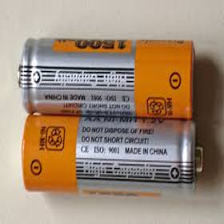

In [17]:
new_df['image'][0]

# Model Creation
## Preprocessing

In [ ]:
def preprocess_image(image):
    image = np.array(image, dtype=np.float32)
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / (std + 1e-7)  

def create_dataset(images, labels, batch_size=16, is_training=False):
    def generator():
        for img, label in zip(images, labels):
            img = preprocess_image(img)  
            yield img, label

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int64)
        )
    )
    
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE).repeat()
    else:
        dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df['image'], new_df['label'], test_size=0.2, random_state=42)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

train_dataset = create_dataset(X_train, y_train, batch_size=16, is_training=True)
test_dataset = create_dataset(X_test, y_test, batch_size=16)

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch_train = len(X_train) // 16
steps_per_epoch_val = len(X_test) // 16

model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    class_weight=class_weight_dict,
    verbose=1,
    callbacks=[lr_scheduler, early_stopping],  # Add both scheduler and early stopping
    steps_per_epoch=steps_per_epoch_train,
    validation_steps=steps_per_epoch_val
)

loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 505s 955ms/step - accuracy: 0.3917 - loss: 1.6237 - val_accuracy: 0.5245 - val_loss: 1.3215 - learning_rate: 0.0010
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 496s 954ms/step - accuracy: 0.5503 - loss: 1.1997 - val_accuracy: 0.5668 - val_loss: 1.2429 - learning_rate: 0.0010
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 494s 948ms/step - accuracy: 0.6027 - loss: 1.0564 - val_accuracy: 0.5784 - val_loss: 1.1741 - learning_rate: 0.0010
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 502s 964ms/step - accuracy: 0.6493 - loss: 0.9451 - val_accuracy: 0.6072 - val_loss: 1.1325 - learning_rate: 0.0010
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 493s 946ms/step - accuracy: 0.6769 - loss: 0.8569 - val_accuracy: 0.6010 - val_loss: 1.1437 - learning_rate: 0.0010
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 501s 962ms/step - accuracy: 0.7112 - loss: 0.7851 - val_accuracy: 0.6125 - val_loss: 1.1579 - learning_rate: 0.0010
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy

2024-12-06 07:58:50.984395: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [22]:
bucket_name = 'computer-vision-poc-trash-scan'
file_key = 'foil.jpg'

s3 = boto3.client('s3')

response = s3.get_object(Bucket=bucket_name, Key=file_key)
image_data = response['Body'].read()

nparr = np.frombuffer(image_data, np.uint8)

image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

image = cv2.resize(image, (224, 224))

image = image / 255.0

image = np.expand_dims(image, axis=0)

In [23]:
image = preprocess_image(image)
predictions = model.predict(image)
predicted_label = np.argmax(predictions, axis=1)
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: [1]


In [ ]:
bucket_name = 'computer-vision-poc-trash-scan'
file_keys = ['brita.jpg', 'foil.jpg', 'IMG_5529.jpg', 'IMG_7402.jpg',
             'jar.jpg', 'metal_cup.jpg', 'metal.jpg', 'napkin.jpg', 'plastic_bottle_example_poc.png']
actual_labels = [6, 4, 2, 2, 3, 4, 4, 7, 6]  # Replace with correct labels

correct_predictions = 0
total_predictions = len(file_keys)

for idx, file_key in enumerate(file_keys):
    response = s3.get_object(Bucket=bucket_name, Key=file_key)
    image_data = response['Body'].read()

    nparr = np.frombuffer(image_data, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    image = cv2.resize(image, (224, 224))

    image = preprocess_image(image)
    
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)[0]

    if predicted_label == actual_labels[idx]:
        correct_predictions += 1

    print(f"File: {file_key}")
    print(f"Actual Label: {actual_labels[idx]}, Predicted Label: {predicted_label}\n")

accuracy = correct_predictions / total_predictions
print(f"Overall Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
File: brita.jpg
Actual Label: 6, Predicted Label: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
File: foil.jpg
Actual Label: 4, Predicted Label: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
File: IMG_5529.jpg
Actual Label: 2, Predicted Label: 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
File: IMG_7402.jpg
Actual Label: 2, Predicted Label: 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
File: jar.jpg
Actual Label: 3, Predicted Label: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
File: metal_cup.jpg
Actual Label: 4, Predicted Label: 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
File: metal.jpg
Actual Label: 4, Predicted Label: 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
File: napkin.jpg
Actual Label: 7, Predicted Label: 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
File: plastic_bottle_example_poc.png
Actual Label: 6, Predicted Label: 7

Overall Accuracy: 0.44


In [25]:
tf.saved_model.save(model, "final_model")

INFO:tensorflow:Assets written to: final_model/assets


INFO:tensorflow:Assets written to: final_model/assets


In [26]:
! tar -czvf final_epoch_model.tar.gz -C final_model .

./
./assets/
./fingerprint.pb
./variables/
./variables/variables.index
./variables/variables.data-00000-of-00001
./saved_model.pb
